https://drive.google.com/file/d/1GLFjuNb7u_5UU9kULU4B37G73wWKA2up/view?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score

In [3]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/Concrete_Data.xlsx")
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [4]:
df.columns=["Cement","BlastFurnaceSlag","FlyAsh","Water","Superplasticizer","CoarseAggregate","FineAggregate","Age","strength"]

In [5]:
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


#**DATA PREPROCESSING**

1. How to check how many rows and columns are present in the dataset?

In [6]:
df.shape

(1030, 9)

2. How to check are there any null values in the data set?

In [7]:
df.isnull().sum()

,0
Cement,0
BlastFurnaceSlag,0
FlyAsh,0
Water,0
Superplasticizer,0
CoarseAggregate,0
FineAggregate,0
Age,0
strength,0


3. How to identify the duplicate values in a dataframe?

In [8]:
df.duplicated().sum()

25

4. How to overcome the duplicate values?

In [9]:
df.drop_duplicates(inplace=True)
df

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


5. Code for getting the summary of dataframe.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1005 non-null   float64
 1   BlastFurnaceSlag  1005 non-null   float64
 2   FlyAsh            1005 non-null   float64
 3   Water             1005 non-null   float64
 4   Superplasticizer  1005 non-null   float64
 5   CoarseAggregate   1005 non-null   float64
 6   FineAggregate     1005 non-null   float64
 7   Age               1005 non-null   int64  
 8   strength          1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [11]:
df.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [12]:
corr = df.corr()
corr['strength'].sort_values(ascending = False)

,strength
strength,1.000000
Cement,0.488283
Superplasticizer,0.344225
Age,0.337371
BlastFurnaceSlag,0.103370
FlyAsh,-0.080648
CoarseAggregate,-0.144710
FineAggregate,-0.186457
Water,-0.269606


#**Exploratory Data Analysis**

<ipython-input-13-348e8c043aa5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Cement'])


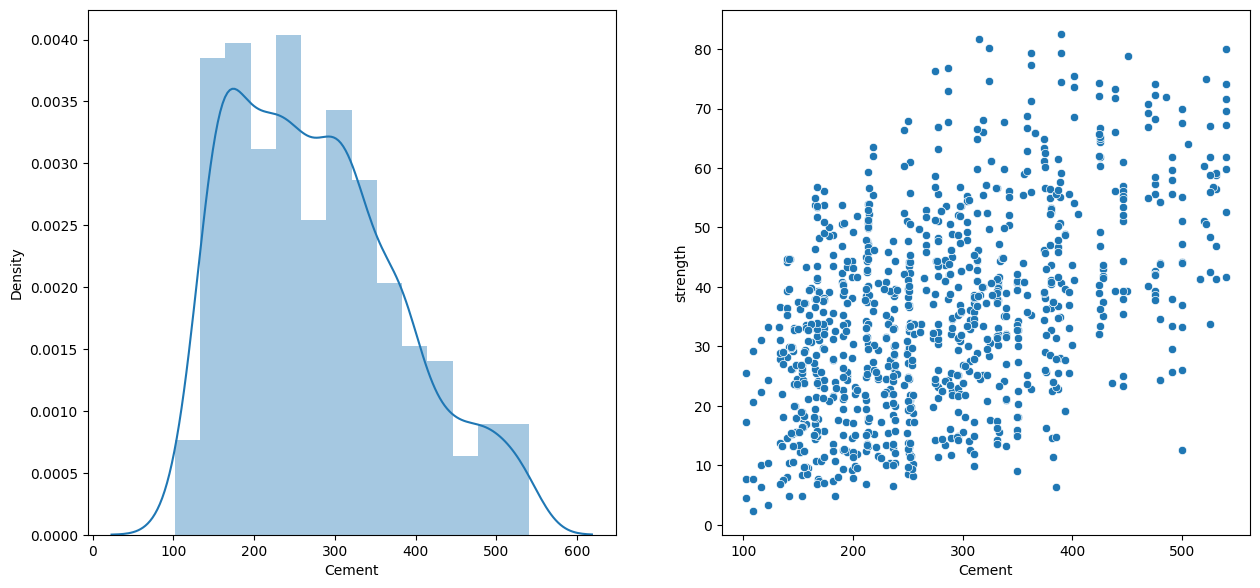

In [13]:
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias 'plt'
import seaborn as sns

plt.figure(figsize=[15,15])
plt.subplot(221)
sns.distplot(df['Cement'])
plt.subplot(222)
sns.scatterplot(x='Cement',y='strength',data=df)
plt.show()

<ipython-input-14-0dc2b963fcd0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Water'])


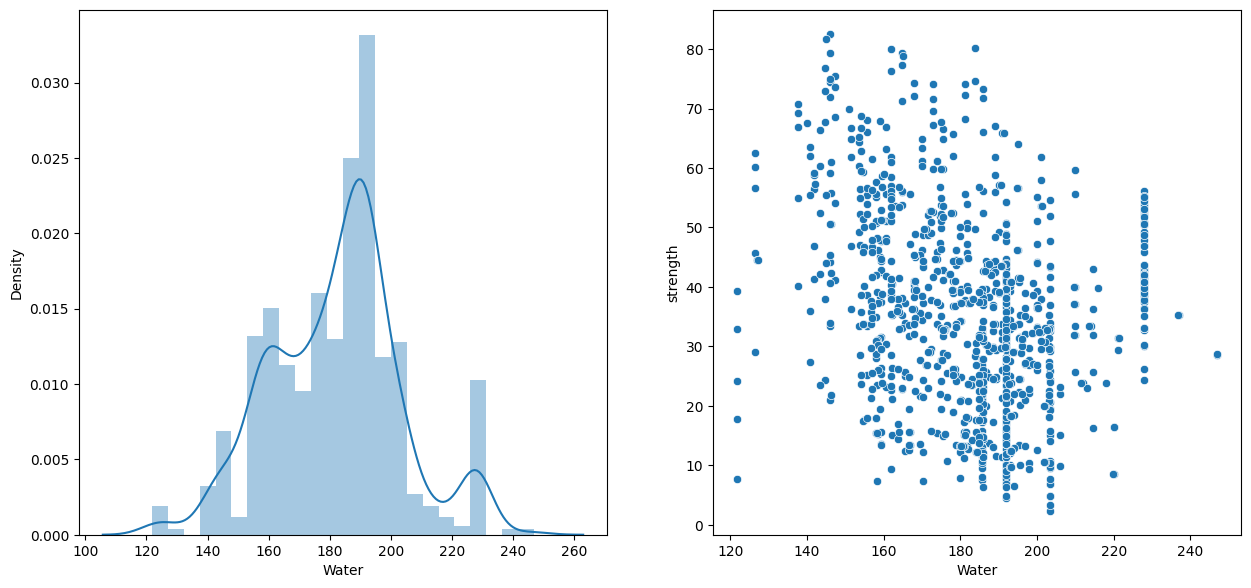

In [14]:
plt.figure(figsize=[15,15])
plt.subplot(221)
sns.distplot(df['Water'])
plt.subplot(222)
sns.scatterplot(x='Water',y='strength',data=df)
plt.show()

<ipython-input-15-2349935779dc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Superplasticizer'])


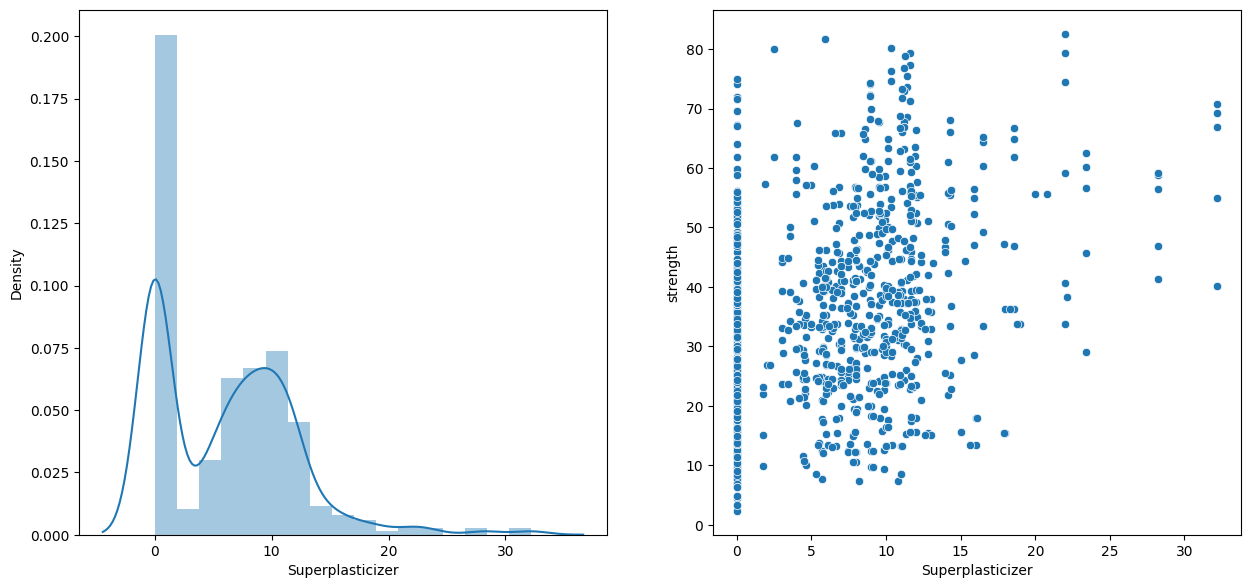

In [15]:
plt.figure(figsize=[15,15])
plt.subplot(221)
sns.distplot(df['Superplasticizer'])
plt.subplot(222)
sns.scatterplot(x='Superplasticizer',y='strength',data=df)
plt.show()

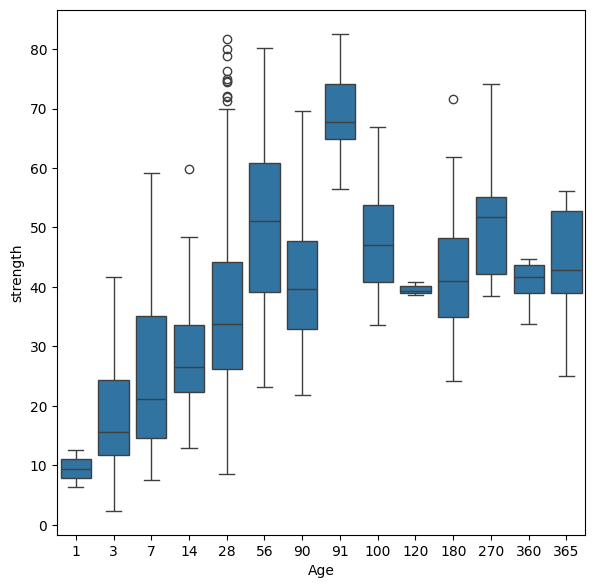

In [16]:
plt.figure(figsize=[15,15])
plt.subplot(221)
sns.boxplot(x='Age',y='strength',data=df)
plt.show()

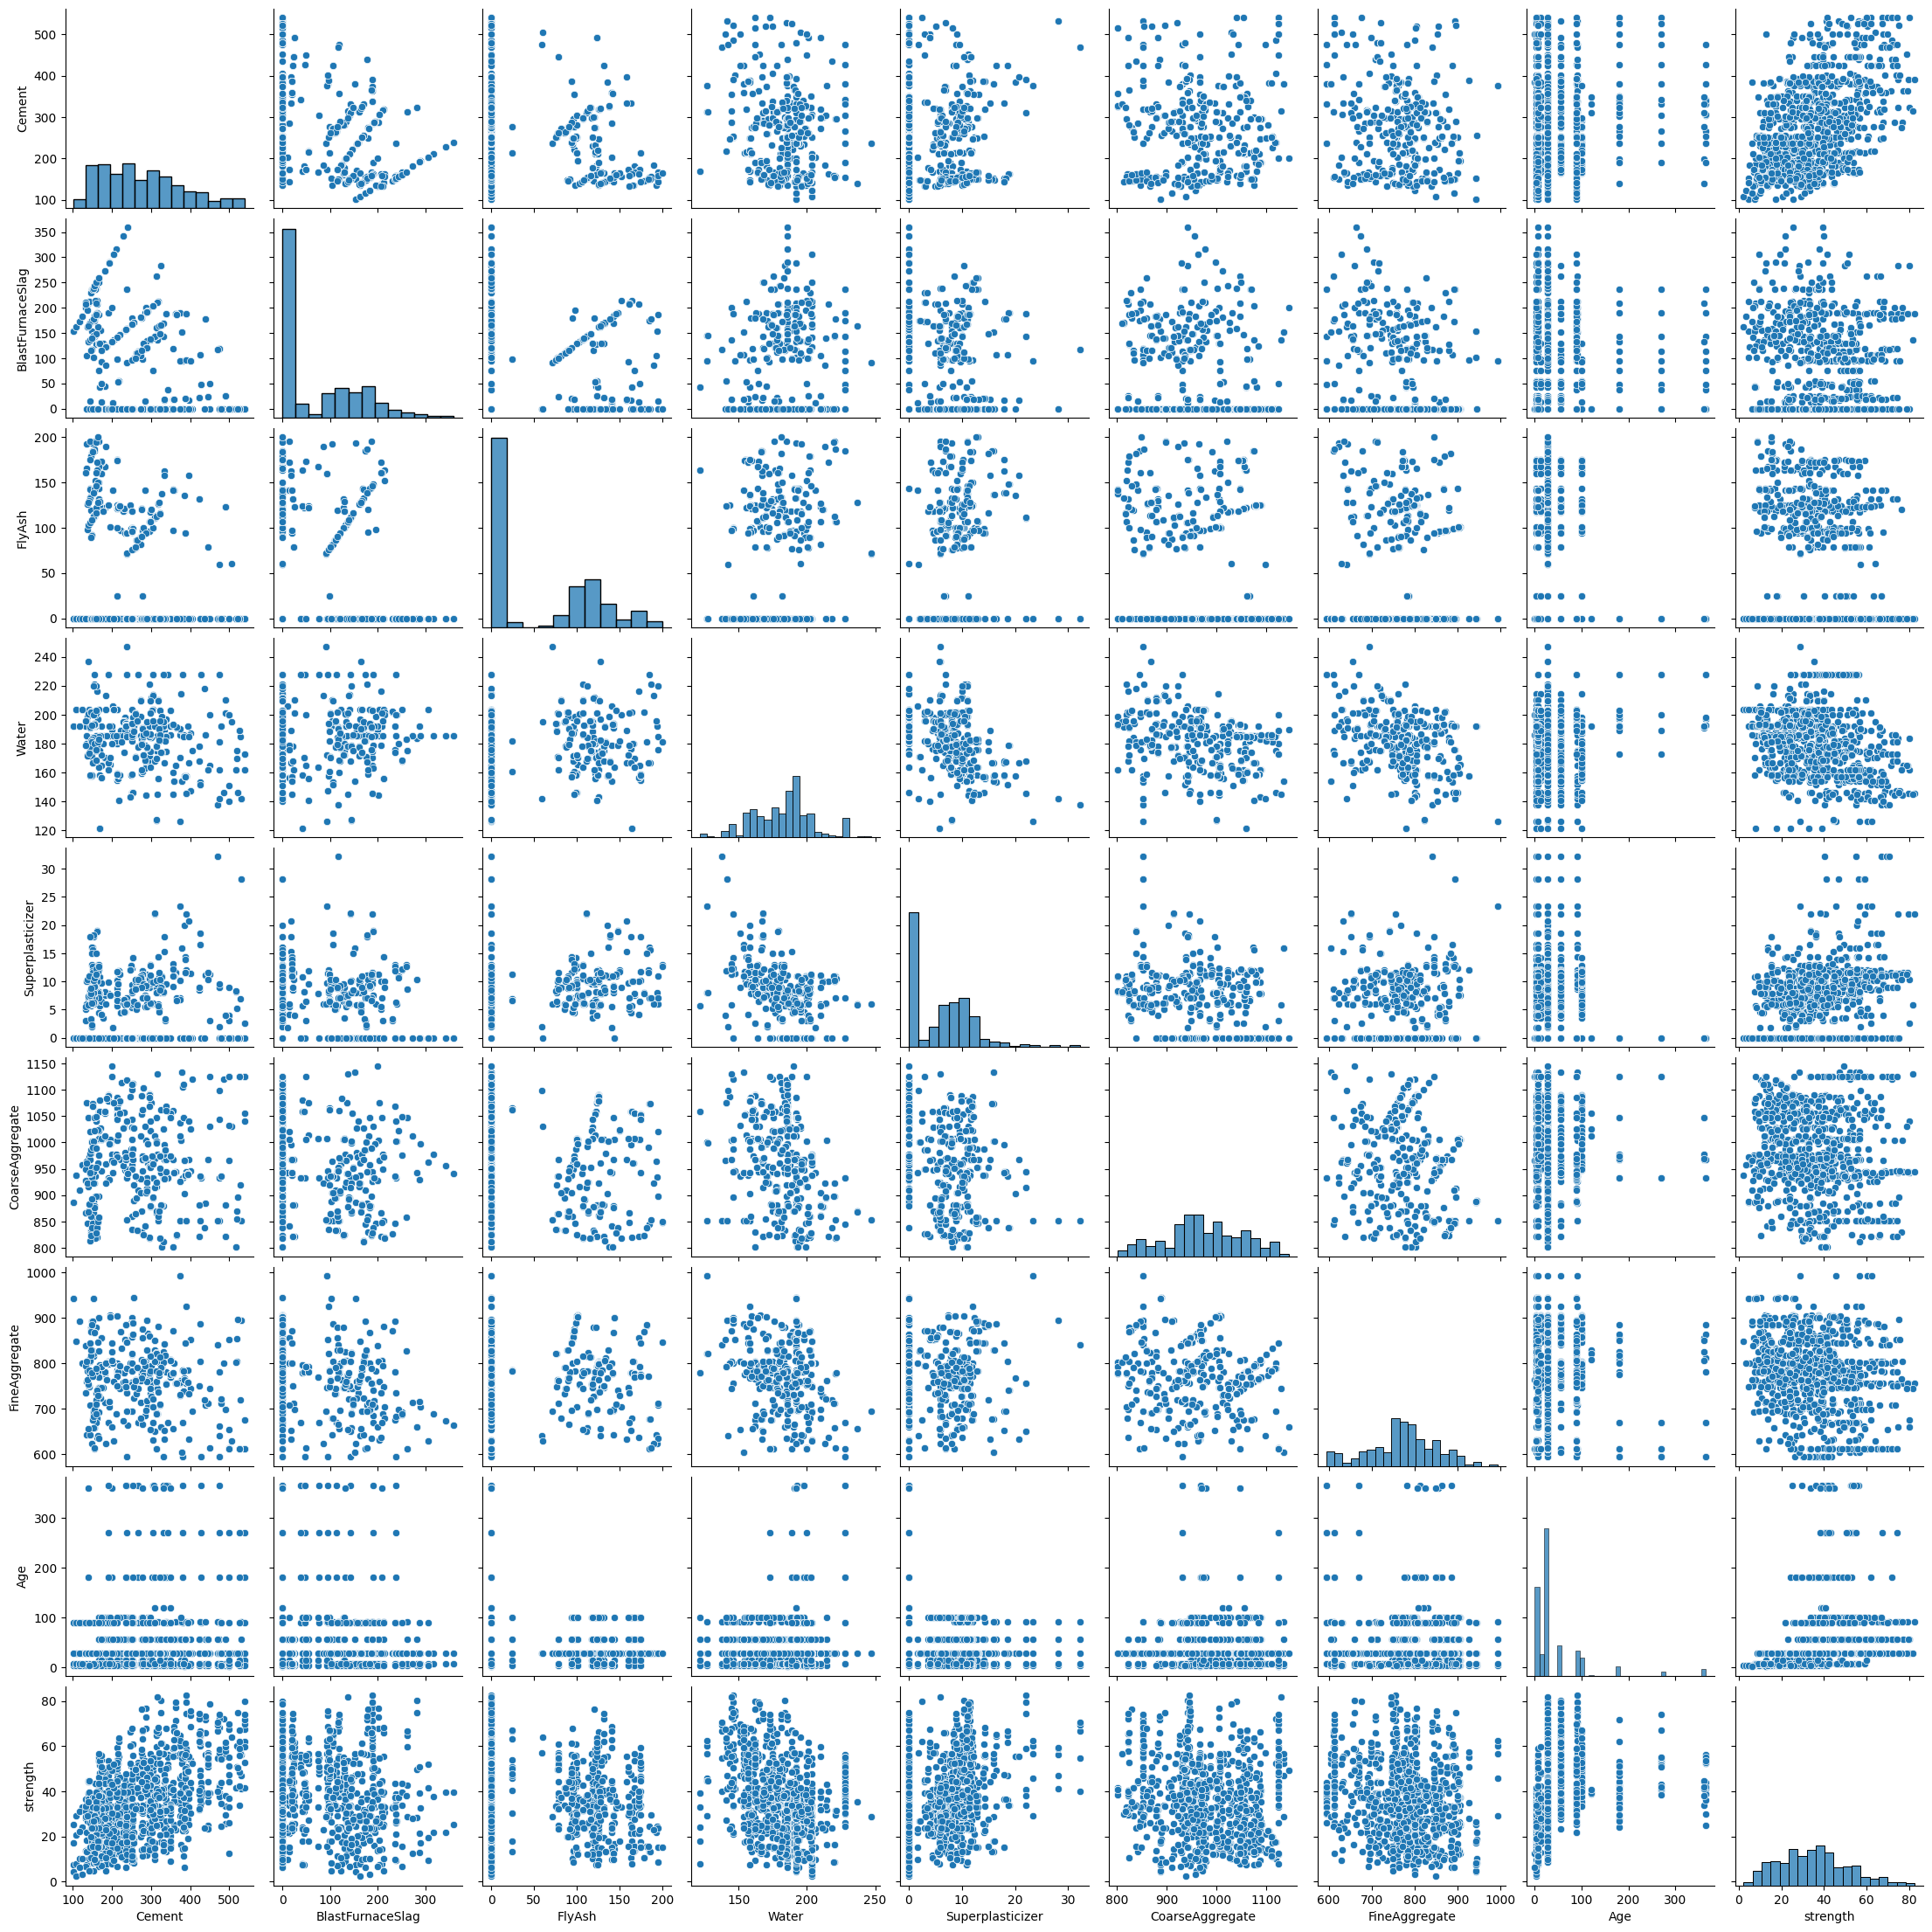

In [17]:
sns.pairplot(df)
plt.show()

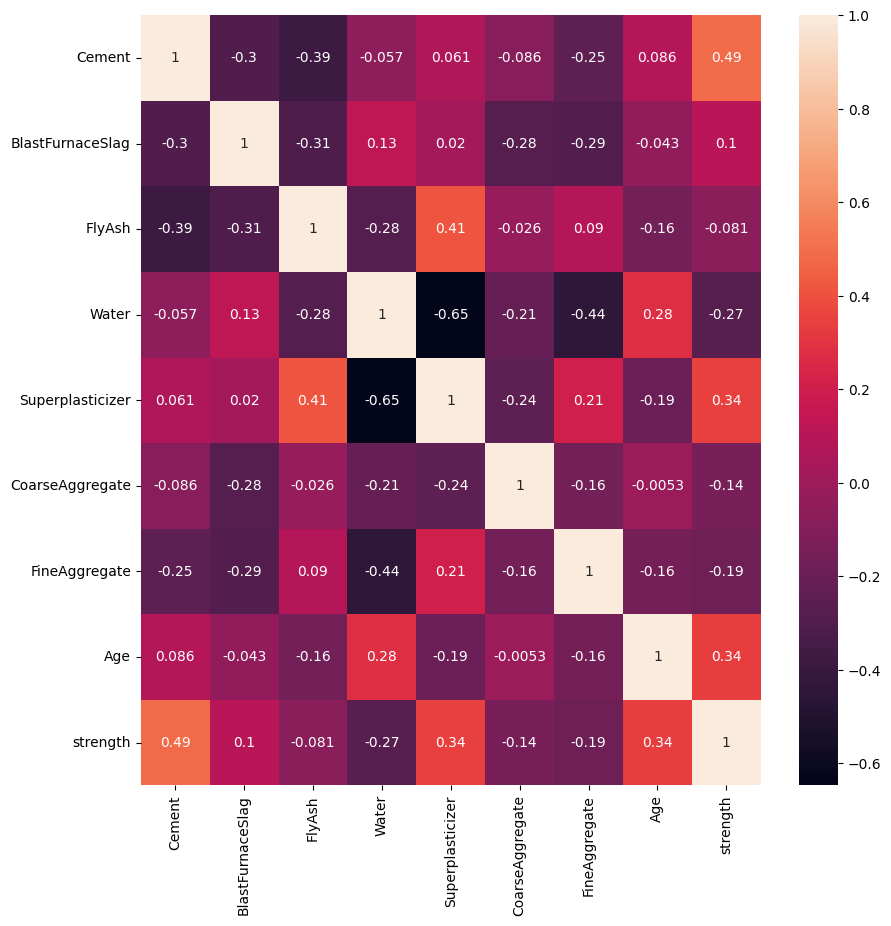

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

#**MODEL BUILDING**


#**LINEAR REGRESSION**

In [19]:
X = df.drop('strength', axis=1)
y = df['strength']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
#Creating a linear regression model
model = LinearRegression()

In [23]:
#Fitting the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [24]:
#Making predictions on the test data
y_pred = model.predict(X_test)

In [25]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate Mean Absolute Error (MAE)
mae1 = mean_absolute_error(y_test, y_pred)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae1)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)

Mean Squared Error: 125.265338276725
Mean Absolute Error: 8.896027820458997
Root Mean Squared Error: 11.19219988548833
R-squared (R²): 0.580108901995383


#**RANDOM FOREST REGRESSOR**

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
# Create a random forest regression model
model = RandomForestRegressor()

In [29]:
# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [31]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate Mean Absolute Error (MAE)
mae2 = mean_absolute_error(y_test, y_pred)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae2)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)

Mean Squared Error: 27.40743972349807
Mean Absolute Error: 3.557217012554143
Root Mean Squared Error: 5.235211526146586
R-squared (R²): 0.9081298935738137


#**KNN REGRESSOR**

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
model = KNeighborsRegressor(n_neighbors=5)

In [34]:
model.fit(X_train, y_train)

KNeighborsRegressor()

In [35]:
y_pred = model.predict(X_test)

In [36]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate Mean Absolute Error (MAE)
mae3 = mean_absolute_error(y_test, y_pred)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae3)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)

Mean Squared Error: 89.59711037466813
Mean Absolute Error: 7.233026334203217
Root Mean Squared Error: 9.465575015532238
R-squared (R²): 0.6996692814563655


#**SUPPORT VECTOR REGRESSOR**

In [37]:
from sklearn.svm import SVR

In [38]:
model = SVR()

In [39]:
model.fit(X_train, y_train)

SVR()

In [40]:
y_pred = model.predict(X_test)

In [41]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate Mean Absolute Error (MAE)
mae4 = mean_absolute_error(y_test, y_pred)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae4)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)

Mean Squared Error: 238.03118187441322
Mean Absolute Error: 12.311563862046931
Root Mean Squared Error: 15.428259197797178
R-squared (R²): 0.20211627820147926


#**GRADIENT BOOSTING**

In [42]:
# Split the data into training and testing sets
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
# Create a Gradient Boosting Regressor model with desired hyperparameters
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [44]:
y_pred = gbr.predict(X_test)
y_pred

array([25.17646875, 24.96499246, 22.52590537, 37.92288629, 45.83023594,
       31.33189331, 21.99459149, 22.70576564, 32.48945008, 33.02548698,
       28.07135852, 29.68193255, 39.10333617, 43.95371755, 33.88824148,
       16.04085485, 36.50097238, 51.12616215, 46.65157599, 36.58119562,
       35.54027447,  9.79078005, 42.9175691 , 32.03426875,  7.68682228,
       35.58055793, 58.50811802, 34.180739  , 18.88523034, 50.4018831 ,
       42.74517844, 48.58159055, 51.53611808, 46.37438198, 14.47986293,
       41.66610815, 46.05640889, 45.90075662, 41.92493258, 78.9001692 ,
       38.3925206 , 31.58270659, 41.29959809, 47.41048026, 54.83771855,
       50.74321764, 60.43103025, 25.23005673, 54.66434051, 37.9955686 ,
       21.21980749, 52.12812526, 37.02894798,  8.17457651, 30.99993226,
       34.60735109, 55.11742963, 12.43622863, 35.41400081, 50.30372117,
       34.89845245, 37.7554558 , 37.55425181, 32.00304274, 45.17566539,
       55.12247558, 38.12143649, 37.47021593, 55.73279   , 52.50

In [45]:
# Calculate Mean Absolute Error (MAE)
mae5 = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae5)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)

Mean Absolute Error: 4.082291828957919
Mean Squared Error: 30.294504235424657
Root Mean Squared Error: 5.5040443526033345
R-squared (R²): 0.8984524145153608


#**DECISION TREE REGRESSOR**

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
# Create a Decision Tree Regressor model
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [48]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)
y_pred

array([19.00885332, 20.59395864, 17.96429718, 42.42345828, 44.0919902 ,
       39.300132  , 22.34798559, 26.25800398, 33.70158688, 32.01138572,
       28.99108685, 17.59680647, 39.48629052, 38.01770664, 47.401475  ,
       17.54026944, 39.38286912, 52.82075636, 51.03501352, 36.83870268,
       33.79811352, 12.73462172, 40.2309246 , 47.401475  ,  6.46728488,
       37.99702236, 68.29949256, 34.67374804, 15.81657944, 44.52360218,
       43.94237391, 56.83350668, 49.20100736, 45.08483564, 15.04919265,
       37.79707432, 49.77327244, 49.97322048, 43.58177796, 79.40005616,
       44.27814872, 27.923778  , 37.99702236, 41.05140104, 56.8472962 ,
       44.14025352, 68.29949256, 36.4388066 , 60.28088668, 46.24315532,
       21.81984697, 54.31554033, 37.72192144,  9.56165317, 39.1622368 ,
       37.42475728, 49.89737812, 13.66403537, 39.35804798, 52.90831981,
       33.05347944, 38.56239268, 41.71950328, 30.12320644, 45.2985732 ,
       59.59042572, 33.56369168, 40.7135578 , 62.93536928, 47.22

In [49]:
# Calculate Mean Absolute Error (MAE)
mae6 = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae6)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)

Mean Absolute Error: 3.8355373468132274
Mean Squared Error: 37.88764298797654
Root Mean Squared Error: 6.155293899398837
R-squared (R²): 0.873000111332599


#**ADA BOOST**


In [50]:
from sklearn.ensemble import AdaBoostRegressor
# Assuming you have a dataset (X, y), replace this with your actual dataset
# For demonstration, let's create a random dataset

# Split the data into training and testing sets


# Initialize the AdaBoost regressor without specifying the base estimator
adaboost_regressor = AdaBoostRegressor(n_estimators=100,learning_rate=0.1)

# Train the AdaBoost regressor
adaboost_regressor.fit(X_train, y_train)

# Make predictions
y_pred = adaboost_regressor.predict(X_test)
# Calculate Mean Absolute Error (MAE)
mae7 = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae7)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)


Mean Absolute Error: 6.742023940379265
Mean Squared Error: 72.07846476723093
Root Mean Squared Error: 8.489903695992725
R-squared (R²): 0.7583920170578974


#**XG BOOST**

In [51]:
from xgboost import XGBRegressor
# Assuming you have a dataset (X, y), replace this with your actual dataset
# Split the data into training and testing sets


# Initialize the XGBoost regressor
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1)

# Train the XGBoost regressor
xgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred = xgb_regressor.predict(X_test)
# Calculate Mean Absolute Error (MAE)
mae8 = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae8)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)

Mean Absolute Error: 2.9327385864113493
Mean Squared Error: 20.758514502114636
Root Mean Squared Error: 4.556151281741491
R-squared (R²): 0.9304171803058371


#**ARTIFICIAL NEURAL NETWORK**

In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
def build_model():
    model = models.Sequential([
        layers.Dense(64, activation='linear', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='linear'),
        layers.Dense(1)  # No activation for regression
    ])

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=2)

Epoch 1/100
21/21 - 1s - 67ms/step - loss: 1477.7842 - mae: 35.1446 - val_loss: 1413.2570 - val_mae: 34.6407
Epoch 2/100
21/21 - 0s - 7ms/step - loss: 1352.8492 - mae: 34.1161 - val_loss: 1300.1583 - val_mae: 33.6807
Epoch 3/100
21/21 - 0s - 6ms/step - loss: 1199.4099 - mae: 32.4539 - val_loss: 1155.1796 - val_mae: 32.0006
Epoch 4/100
21/21 - 0s - 8ms/step - loss: 1017.2226 - mae: 29.8939 - val_loss: 980.6232 - val_mae: 29.4163
Epoch 5/100
21/21 - 0s - 14ms/step - loss: 823.1270 - mae: 26.5818 - val_loss: 780.3674 - val_mae: 25.9282
Epoch 6/100
21/21 - 0s - 13ms/step - loss: 618.3433 - mae: 22.7972 - val_loss: 557.8915 - val_mae: 21.3640
Epoch 7/100
21/21 - 0s - 17ms/step - loss: 420.0818 - mae: 18.3143 - val_loss: 351.8404 - val_mae: 16.3652
Epoch 8/100
21/21 - 0s - 13ms/step - loss: 248.4935 - mae: 13.5802 - val_loss: 194.9616 - val_mae: 11.4075
Epoch 9/100
21/21 - 0s - 13ms/step - loss: 146.0285 - mae: 9.9056 - val_loss: 127.9629 - val_mae: 8.8335
Epoch 10/100
21/21 - 0s - 13ms/step

In [56]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
print(f"Test MSE: {test_mse_score}\nTest MAE: {test_mae_score}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 107.1326 - mae: 8.3355 
Test MSE: 100.90599822998047
Test MAE: 8.045903205871582


In [57]:
predictions = model.predict(X_test)
print(predictions.flatten())

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[51.43612  37.45263  21.999048 27.862106 52.464504 23.384323 57.796837
 53.638367 40.453266 36.202415 28.649355 23.996819 35.382984 31.94141
 36.150826 37.862133 22.962557 23.782396 18.32497  53.004112 11.894405
 22.861202 38.427498 33.72721  46.083416 56.141373 32.75697  23.308746
 22.962307 22.50245  25.043251 25.642467 25.526484 25.508919 50.559547
 32.24629  28.429039 16.643305 46.10393  23.967669 18.20253  39.660587
 26.722242 31.675617 18.326096 23.294855 51.829594 32.439213 47.461525
 34.01642  25.476904 31.921726 39.537106 34.247307 18.007309 29.647842
 38.337135 30.308212 57.331696 40.51935  52.749588 39.526276 27.137733
 28.766418 20.984665 32.7548   31.06587  49.574535 19.206978 12.571494
 39.94677  27.467213 31.41918  49.00318  38.444027 37.031567 23.973026
 47.852776 35.447754 52.050934 40.615753 36.76786  42.76544  33.34854
 25.239237 34.94207  26.443714 34.483757 43.007507 40.70008  29.838245
 41.456272 19.469254 31.536972 39.62639  

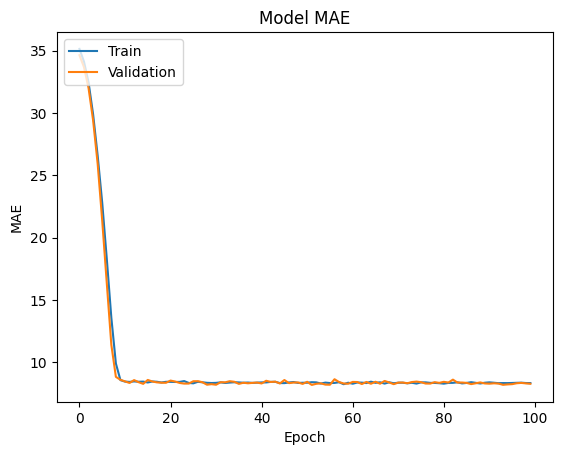

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


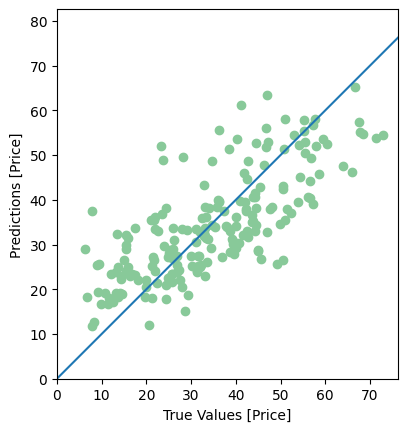

In [59]:
# Make predictions
predictions = model.predict(X_test).flatten()

# Plotting true labels vs predicted labels
plt.scatter(y_test, predictions, color = '#88c999')
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
# plt.legend()
plt.show()


#**MULTI COLLINEARITY**

In [61]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(X)

,variables,VIF
0,Cement,15.155077
1,BlastFurnaceSlag,3.261879
2,FlyAsh,4.171453
3,Water,81.395278
4,Superplasticizer,5.171809
5,CoarseAggregate,84.738626
6,FineAggregate,72.495779
7,Age,1.696228
